<a href="https://colab.research.google.com/github/Syedaly/ML-Supervised/blob/main/LogisticRegression_Pumpkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
!wget https://raw.githubusercontent.com/Syedaly/ML-Supervised/main/US-pumpkins.csv
pumpkins = pd.read_csv('US-pumpkins.csv')
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins.head()

--2024-02-08 07:09:38--  https://raw.githubusercontent.com/Syedaly/ML-Supervised/main/US-pumpkins.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172012 (168K) [text/plain]
Saving to: ‘US-pumpkins.csv’

US-pumpkins.csv     100%[===================>] 167.98K  --.-KB/s    in 0.02s   

2024-02-08 07:09:38 (7.05 MB/s) - ‘US-pumpkins.csv’ saved [172012/172012]



,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [3]:

columns_to_select = ['City Name','Package','Variety', 'Origin','Item Size', 'Color']
pumpkins = pumpkins.loc[:, columns_to_select]
pumpkins.dropna(inplace=True)
pumpkins.head()

,City Name,Package,Variety,Origin,Item Size,Color
70,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,DELAWARE,med,ORANGE
71,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,DELAWARE,sml,ORANGE
72,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,DELAWARE,sml,ORANGE
73,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,OHIO,med,ORANGE
75,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,DELAWARE,sml,ORANGE


In [4]:
pumpkins.info

<bound method DataFrame.info of       City Name               Package    Variety    Origin Item Size   Color
70    BALTIMORE  1 1/9 bushel cartons   PIE TYPE  DELAWARE       med  ORANGE
71    BALTIMORE  1 1/9 bushel cartons   PIE TYPE  DELAWARE       sml  ORANGE
72    BALTIMORE  1 1/9 bushel cartons   PIE TYPE  DELAWARE       sml  ORANGE
73    BALTIMORE  1 1/9 bushel cartons   PIE TYPE      OHIO       med  ORANGE
75    BALTIMORE  1 1/9 bushel cartons   PIE TYPE  DELAWARE       sml  ORANGE
...         ...                   ...        ...       ...       ...     ...
1236   NEW YORK    1/2 bushel cartons  MINIATURE      OHIO       sml   WHITE
1239   NEW YORK    1/2 bushel cartons  MINIATURE      OHIO       sml   WHITE
1257    DETROIT  1 1/9 bushel cartons   PIE TYPE  MICHIGAN       med  ORANGE
1258    DETROIT  1 1/9 bushel cartons   PIE TYPE  MICHIGAN       med  ORANGE
1259    DETROIT  1 1/9 bushel cartons   PIE TYPE  MICHIGAN       med  ORANGE

[187 rows x 6 columns]>

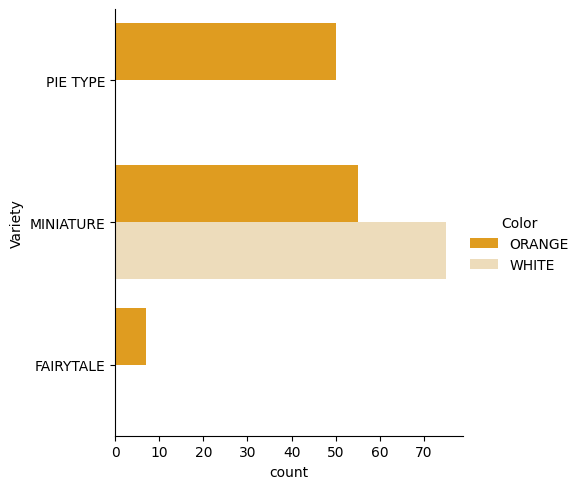

In [5]:
import seaborn as sns

palette = {
'ORANGE': 'orange',
'WHITE': 'wheat',
}

sns.catplot(
data=pumpkins, y="Variety", hue="Color", kind="count",
palette=palette,
)

In [6]:
from sklearn.preprocessing import OrdinalEncoder

item_size_categories = [['sml', 'med', 'med-lge', 'lge', 'xlge', 'jbo', 'exjbo']]
ordinal_features = ['Item Size']
ordinal_encoder = OrdinalEncoder(categories=item_size_categories)

In [7]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['City Name', 'Package', 'Variety', 'Origin']
categorical_encoder = OneHotEncoder(sparse_output=False)

In [8]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[
  ('ord', ordinal_encoder, ordinal_features),
  ('cat', categorical_encoder, categorical_features)
  ])

ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(pumpkins)

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(pumpkins['Color'])

In [10]:
encoded_pumpkins = encoded_features.assign(Color=encoded_label)
encoded_pumpkins

,ord__Item Size,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DETROIT,cat__City Name_NEW YORK,cat__Package_1 1/9 bushel cartons,cat__Package_1 1/9 bushel crates,cat__Package_1/2 bushel cartons,...,cat__Variety_MINIATURE,cat__Variety_PIE TYPE,cat__Origin_DELAWARE,cat__Origin_MARYLAND,cat__Origin_MASSACHUSETTS,cat__Origin_MICHIGAN,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_VIRGINIA,Color
70,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
71,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
72,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
73,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
75,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1239,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1257,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1258,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [11]:
from sklearn.model_selection import train_test_split

X = encoded_pumpkins[encoded_pumpkins.columns.difference(['Color'])]
y = encoded_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [12]:
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('F1-score: ', f1_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68        27
           1       0.33      0.45      0.38        11

    accuracy                           0.58        38
   macro avg       0.54      0.54      0.53        38
weighted avg       0.62      0.58      0.59        38

Predicted labels:  [1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0
 0]
F1-score:  0.3846153846153846


In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[17, 10],
       [ 6,  5]])

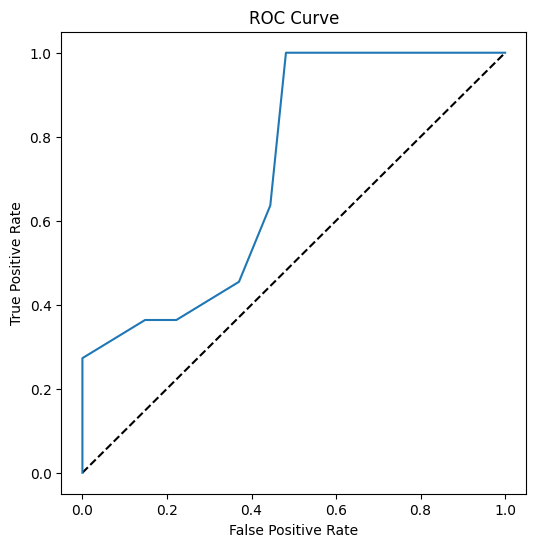

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [15]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.7239057239057239
